<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/08_Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download and unzip

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-06-05 05:03:32--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-06-05 05:03:33 (153 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [2]:
import zipfile

file_ref = zipfile.ZipFile('nlp_getting_started.zip')
file_ref.extractall()
file_ref.close()

##Explore the data

In [3]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 5231 to 6566
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 356.9+ KB


In [ ]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [ ]:
train_df.describe(include=['O'])

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


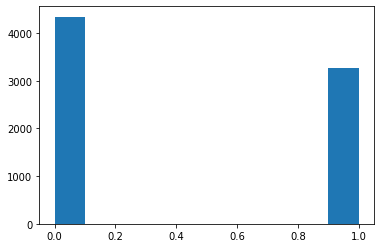

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_df['target'])
plt.show()

In [4]:
import random

train_df_shuffled = train_df.sample(frac=1)
i = random.randint(0, len(train_df)-5)
df_5_sample = train_df_shuffled[i:i+5]
df_5_sample

,id,keyword,location,text,target
1135,1636,bombing,"Sydney, Australia",Today marks the 70th anniversary of the bombin...,1
5365,7654,panic,"Linton Hall, VA",Is it time to panic now? https://t.co/OrxDQfz0J0,0
3713,5281,fear,Stanford University,Help me win $$$$ by having the most shares on ...,0
2804,4032,disaster,Dappar (Mohali) Punjab,@Gurmeetramrahim #MSGDoing111WelfareWorks Gree...,1
4558,6480,injured,India,#BreakingNews Militants attack Udhampur police...,1


In [ ]:
train_df_shuffled[['text']]

,text
6405,Suicide bomber kills 15 in Saudi security site...
3392,This is an evil generation\nRock and roll evac...
3596,Deputies: Dog dispute leads to fatal shooting ...
5828,China's Stock Market Crash: Are There Gems In ...
262,@Whippenz We need help! Horses will die!Please...
...,...
5208,Drunk Meals 101: What To Cook When You're Tota...
6686,Heavy rain frequent thunder and gusty winds mo...
1999,@BradleyBrad47 yeah but being fast and doing e...
6106,If there's a chance will get a gander of the s...


In [ ]:
train_df_shuffled[['text', 'target']]

,text,target
6405,Suicide bomber kills 15 in Saudi security site...,1
3392,This is an evil generation\nRock and roll evac...,0
3596,Deputies: Dog dispute leads to fatal shooting ...,1
5828,China's Stock Market Crash: Are There Gems In ...,0
262,@Whippenz We need help! Horses will die!Please...,0
...,...,...
5208,Drunk Meals 101: What To Cook When You're Tota...,0
6686,Heavy rain frequent thunder and gusty winds mo...,1
1999,@BradleyBrad47 yeah but being fast and doing e...,1
6106,If there's a chance will get a gander of the s...,0


In [ ]:
i = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][i:i+5].itertuples():
  _, text, target = row
  print(f"Text: {text}")
  print(f"Is real disaster" if target == 1 else "Not a disaster")

Text: salute to all the kids still trapped in adult bodies.
Not a disaster
Text: Warne shocked over Australia's epic collapse at Trent Bridge: Johannesburg Aug 06 (ANI): Legendary Australian... http://t.co/LwwoJXtTIV
Is real disaster
Text: @kaputt21 Hamburg Police Chief Gregory Wickett has told 7 Eyewitness News he 'can't confirm or deny' an investigation is underway.
Not a disaster
Text: Unlicensed teen driver among 2 killed in NC crash http://t.co/Woc6AkEHYX
Is real disaster
Text: Firefighters Headed To California To Fight Wild Fires http://t.co/J2PYkYo0EN
Is real disaster


In [ ]:
train_df_shuffled["text"].to_numpy()

array(['Suicide bomber kills 15 in Saudi security site mosque http://t.co/YyTKP1Z5kG via @Reuters',
       'This is an evil generation\nRock and roll evacuation!\nAs far as the eye can see!\n(Hey hey hey hey!)',
       'Deputies: Dog dispute leads to fatal shooting in Person County http://t.co/OazgHoZGYa #gunfail #nra',
       ...,
       '@BradleyBrad47 yeah but being fast and doing extremely high damage is what its all about if you want fast then im gonna have to get u the-',
       "If there's a chance will get a gander of the sinking ship that is #TNA too. Can't help but appease my morbid curiosity. #DestinationIMPACT",
       'Cramer: Iger\x89Ûªs 3 words that wrecked Disney\x89Ûªs stock \x89ÛÒåÊCNBC http://t.co/PnlucERp0x'],
      dtype=object)

##Data preprocessing

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_df_shuffled["text"].to_numpy(),
    train_df_shuffled["target"].to_numpy(),
    test_size=0.1, random_state=42)

In [ ]:
X_train[:10], y_train[:10]

(array(['West Nyack Pineview Road railroad crossing off Western Highway. Units on scene of a CSX Train vs. truck no injuries.',
        'My biggest fear is disappointing the people who believe in me',
        'I JUST SCREAMED @toddyrockstar http://t.co/JDtPirnm76',
        "First time getting into #gbbo2015 and physically gasped at the cake 'mudslide' incident already way too emotionally invested...",
        "UPDATE 1-Russian 'food crematoria' provoke outrage amid crisis famine memories: * Russian society still recal... http://t.co/J2erZbMjQD",
        'Police Officer Wounded Suspect Dead After Exchanging Shots: Richmond police officer wounded suspect killed after exchange of gunfire',
        'yhngsjlg just tweeted about their secret crush:http://t.co/IoqM5bm1Dg',
        '@Freegeezy17 you stay in Houston?',
        "RT twit_san_diego 'Possible sinkhole disrupts trolley service: A depression in a portion of asphalt in downtown Sa\x89Û_ http://t.co/ANrIOMbHQN'",
        "Reddit's new 

##TextVectorization

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None)

In [8]:
sum([len(element.split()) for element in X_train])/len(X_train)

14.873741059699315

In [9]:
text_vectorizer = TextVectorization(max_tokens=10000,
                                    output_mode="int",
                                    output_sequence_length=25)

In [10]:
text_vectorizer.adapt(X_train)

In [11]:
sample_sentence = random.choice(X_train)
print(sample_sentence)
print(text_vectorizer([sample_sentence]))

SEVERE WEATHER BULLETIN No. 5
FOR: TYPHOON ÛÏ#HannaPHÛ (SOUDELOR)
TROPICAL CYCLONE: WARNING

ISSUED AT 5:00 PM 06... http://t.co/qHwE5K7xUW
tf.Tensor(
[[ 239  219 3116   41  176   10  578 4206  833 1575  570  245  807   17
  2196  172 1450    1    0    0    0    0    0    0    0]], shape=(1, 25), dtype=int64)


In [12]:
words_in_vocab = text_vectorizer.get_vocabulary()
print(f"Top 5 words:{words_in_vocab[:5]}")
print(f"Last 5 words:{words_in_vocab[-5:]}")

Top 5 words:['', '[UNK]', 'the', 'a', 'in']
Last 5 words:['painthey', 'painful', 'paine', 'paging', 'pageshi']


##Embedding

In [13]:
from tensorflow.keras.layers import Embedding

embedding = tf.keras.layers.Embedding(input_dim=10000,
                                      output_dim=128,
                                      embeddings_initializer='uniform',
                                      input_length=25)
embedding

In [ ]:
sample_sentence = random.choice(X_train)
print(sample_sentence)
print(text_vectorizer([sample_sentence]))
print(embedding(text_vectorizer([sample_sentence])))

SoloQuiero Maryland mansion fire that killed 6 caused by damaged plug under Christmas tree report says - Into the flames: Firefighte...
tf.Tensor(
[[8287 2400 2401   42   16  112  575  516   18 1412 2041  212 1896  981
   331  286   68    2  203    1    0    0    0    0    0]], shape=(1, 25), dtype=int64)
tf.Tensor(
[[[-0.02537981 -0.01521661 -0.03660472 ... -0.03890153 -0.04317234
   -0.04493276]
  [ 0.02933583  0.00663701 -0.03326841 ...  0.04941512 -0.02747029
   -0.00146385]
  [-0.03214595  0.03177557 -0.03411261 ...  0.02986624 -0.00489647
    0.00847692]
  ...
  [ 0.01174692  0.00416447  0.00209687 ... -0.01249989 -0.00663622
    0.00532303]
  [ 0.01174692  0.00416447  0.00209687 ... -0.01249989 -0.00663622
    0.00532303]
  [ 0.01174692  0.00416447  0.00209687 ... -0.01249989 -0.00663622
    0.00532303]]], shape=(1, 25, 128), dtype=float32)


##Model 0: Naive Bayes Model as a Baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(X_test, y_test)
baseline_score

0.8018372703412073

In [ ]:
model_0.predict(X_test[:10])

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def evaluate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_result = {'model_accuracy': model_accuracy,
                  'model_precision': model_precision,
                  'model_recall': model_recall,
                  'model_fscore': model_fscore}
  return model_result

In [ ]:
model_0_result = evaluate_results(y_true = y_test, y_pred = model_0.predict(X_test))
model_0_result

{'model_accuracy': 0.8018372703412073,
 'model_fscore': 0.7935038603403574,
 'model_precision': 0.8138875360319527,
 'model_recall': 0.8018372703412073}

##Model 1: Simple Dense Model

In [ ]:
len(X_train)

6851

In [ ]:
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D, Dropout

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs) 
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs)
model_1.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_13 (Text  (None, 25)               0         
 Vectorization)                                                  
                                                                 
 embedding_21 (Embedding)    (None, 25, 128)           1280000   
                                                                 
 dropout_34 (Dropout)        (None, 25, 128)           0         
                                                                 
 global_average_pooling1d_21  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_35 (Dropout)        (None, 128)               0  

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#X_train = tf.expand_dims(X_train, 0)
#X_test = tf.expand_dims(X_test, 0)

In [ ]:
X_train

array(['West Nyack Pineview Road railroad crossing off Western Highway. Units on scene of a CSX Train vs. truck no injuries.',
       'My biggest fear is disappointing the people who believe in me',
       'I JUST SCREAMED @toddyrockstar http://t.co/JDtPirnm76', ...,
       'Photoset: hakogaku: ?åÊI am a kurd. i was born on a battlefield. raised on a battlefield. gunfire sirens... http://t.co/obp595W7tm',
       'I will only call or text 2 niggas my bff &amp; my boyfriend ???? I love my boys to death. No other niggas can hold my attention like them ??',
       'The tragedy of life is not that it ends so soon but that we wait so long to begin it. ~ W.M. Lewis #quotes'],
      dtype=object)

In [ ]:
history_1 = model_1.fit(X_train, y_train,
                        epochs=9,
                        validation_data=(X_test, y_test))

Epoch 1/9
215/215 [==============================] - 4s 16ms/step - loss: 0.6491 - accuracy: 0.6215 - val_loss: 0.5860 - val_accuracy: 0.7585
Epoch 2/9
215/215 [==============================] - 3s 15ms/step - loss: 0.5137 - accuracy: 0.7917 - val_loss: 0.4832 - val_accuracy: 0.7913
Epoch 3/9
215/215 [==============================] - 3s 15ms/step - loss: 0.4161 - accuracy: 0.8368 - val_loss: 0.4447 - val_accuracy: 0.8018
Epoch 4/9
215/215 [==============================] - 3s 15ms/step - loss: 0.3544 - accuracy: 0.8615 - val_loss: 0.4241 - val_accuracy: 0.8123
Epoch 5/9
215/215 [==============================] - 3s 14ms/step - loss: 0.3082 - accuracy: 0.8790 - val_loss: 0.4184 - val_accuracy: 0.8123
Epoch 6/9
215/215 [==============================] - 3s 14ms/step - loss: 0.2721 - accuracy: 0.8967 - val_loss: 0.4244 - val_accuracy: 0.8163
Epoch 7/9
215/215 [==============================] - 3s 14ms/step - loss: 0.2417 - accuracy: 0.9113 - val_loss: 0.4274 - val_accuracy: 0.8241
Epoch 

In [ ]:
model_1_pred_pros = model_1.predict(X_test)
y_pred_1 = tf.round(tf.squeeze(model_1_pred_pros)).numpy()

In [ ]:
model_1_result = evaluate_results(y_true = y_test, y_pred = y_pred_1)
model_1_result

{'model_accuracy': 0.821522309711286,
 'model_fscore': 0.8198939697542694,
 'model_precision': 0.8209307114536215,
 'model_recall': 0.821522309711286}

In [ ]:
import numpy as np

np.array(list(model_1_result.values())) > np.array(list(model_0_result.values()))

array([ True,  True,  True,  True])

In [23]:
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D, Dropout, LSTM
import tensorflow as tf

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = LSTM(units=64, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(units=64)(x)
x = Dropout(0.2)(x)
#x = GlobalAveragePooling1D()(x)
outputs = Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs)

In [24]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [25]:
history_2 = model_2.fit(X_train, y_train,
                        epochs=5,
                        validation_data=(X_test, y_test))

Epoch 1/5
215/215 [==============================] - 6s 12ms/step - loss: 0.5137 - accuracy: 0.7432 - val_loss: 0.4308 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3360 - accuracy: 0.8664 - val_loss: 0.4234 - val_accuracy: 0.8215
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2532 - accuracy: 0.9079 - val_loss: 0.4954 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1829 - accuracy: 0.9361 - val_loss: 0.5811 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1372 - accuracy: 0.9524 - val_loss: 0.7741 - val_accuracy: 0.7887


In [26]:
from tensorflow.keras.layers import GRU

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = GRU(units=64)(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs)

In [27]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [28]:
history_3 = model_3.fit(X_train, y_train,
                        epochs=5,
                        validation_data=(X_test, y_test))

Epoch 1/5
215/215 [==============================] - 6s 13ms/step - loss: 0.6516 - accuracy: 0.6041 - val_loss: 0.5035 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4021 - accuracy: 0.8317 - val_loss: 0.4273 - val_accuracy: 0.8202
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2805 - accuracy: 0.8939 - val_loss: 0.4477 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2026 - accuracy: 0.9273 - val_loss: 0.5240 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1593 - accuracy: 0.9450 - val_loss: 0.5897 - val_accuracy: 0.8045


In [31]:
from tensorflow.keras.layers import Bidirectional

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(units=64))(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs)

In [32]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [33]:
history_4 = model_4.fit(X_train, y_train,
                        epochs=5,
                        validation_data=(X_test, y_test))

Epoch 1/5
215/215 [==============================] - 7s 12ms/step - loss: 0.5292 - accuracy: 0.7310 - val_loss: 0.4268 - val_accuracy: 0.8110
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3297 - accuracy: 0.8644 - val_loss: 0.4203 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2314 - accuracy: 0.9149 - val_loss: 0.4838 - val_accuracy: 0.8005
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1643 - accuracy: 0.9409 - val_loss: 0.6020 - val_accuracy: 0.7940
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1201 - accuracy: 0.9575 - val_loss: 0.6342 - val_accuracy: 0.7835


In [36]:
from tensorflow.keras.layers import Conv1D

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = Embedding(input_dim=10000, output_dim=128, input_length=25)(x)
x = Dropout(0.2)(x)
x = Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = Dropout(0.2)(x)
x = GlobalAveragePooling1D()(x)
outputs = Dense(1, activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs, outputs)

In [37]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [38]:
history_5 = model_5.fit(X_train, y_train,
                        epochs=5,
                        validation_data=(X_test, y_test))

Epoch 1/5
215/215 [==============================] - 10s 10ms/step - loss: 0.5623 - accuracy: 0.7065 - val_loss: 0.4299 - val_accuracy: 0.8084
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3608 - accuracy: 0.8488 - val_loss: 0.4302 - val_accuracy: 0.8189
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2630 - accuracy: 0.8977 - val_loss: 0.4843 - val_accuracy: 0.8058
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1970 - accuracy: 0.9260 - val_loss: 0.5571 - val_accuracy: 0.8071
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1514 - accuracy: 0.9437 - val_loss: 0.6595 - val_accuracy: 0.7927
